In [1]:
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# keys meaning
'''crim: Per capita crime rate by town.
zn: Proportion of large residential lots (over 25,000 sq. ft.).
indus: Proportion of non-retail business acres per town.
Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
nox: Concentration of nitrogen oxides in the air.
rm: Average number of rooms per dwelling.
age: Proportion of old owner-occupied units built before 1940.
dis: Weighted distances to Boston employment centers.
rad: Index of accessibility to radial highways.
tax: Property tax rate per $10,000.
ptratio:  pupil-teacher ratio by town
b: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
lstat:    % lower status of the population
medv:    Median value of owner-occupied homes in $1000's

'''

"crim: Per capita crime rate by town.\nzn: Proportion of large residential lots (over 25,000 sq. ft.).\nindus: Proportion of non-retail business acres per town.\nChas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).\nnox: Concentration of nitrogen oxides in the air.\nrm: Average number of rooms per dwelling.\nage: Proportion of old owner-occupied units built before 1940.\ndis: Weighted distances to Boston employment centers.\nrad: Index of accessibility to radial highways.\ntax: Property tax rate per $10,000.\nptratio:  pupil-teacher ratio by town\nb: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nlstat:    % lower status of the population\nmedv:    Median value of owner-occupied homes in $1000's\n\n"

In [3]:
boston = pd.read_csv('BostonHousing.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
boston.dropna(inplace=True)

In [6]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Exploratory Data Analysis

In [8]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


<Axes: >

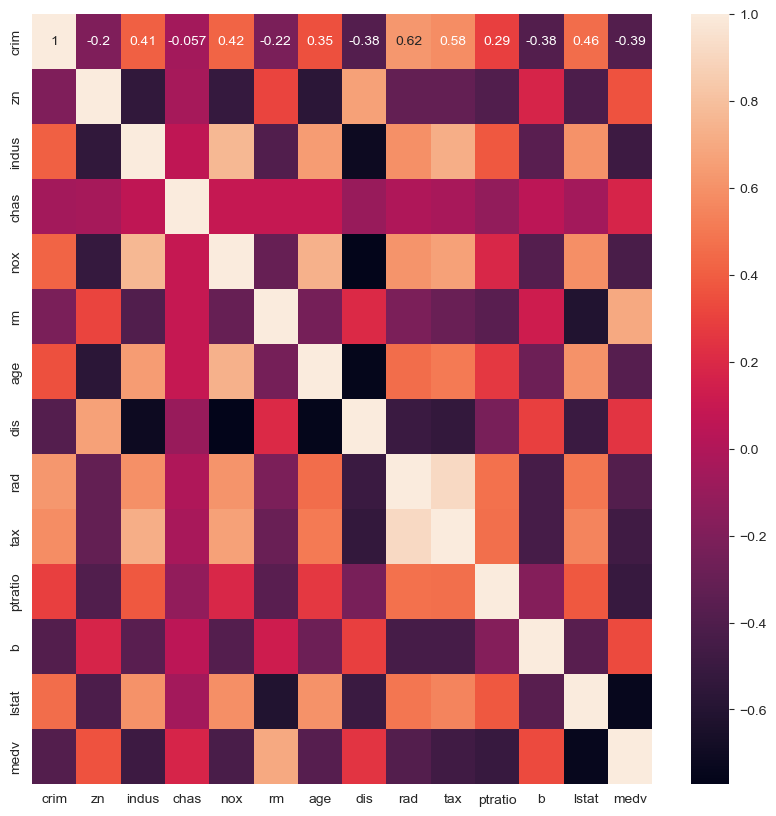

In [9]:
#Heatmap with number
plt.figure(figsize=(10,10))
sns.heatmap(boston.corr(),annot=True)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

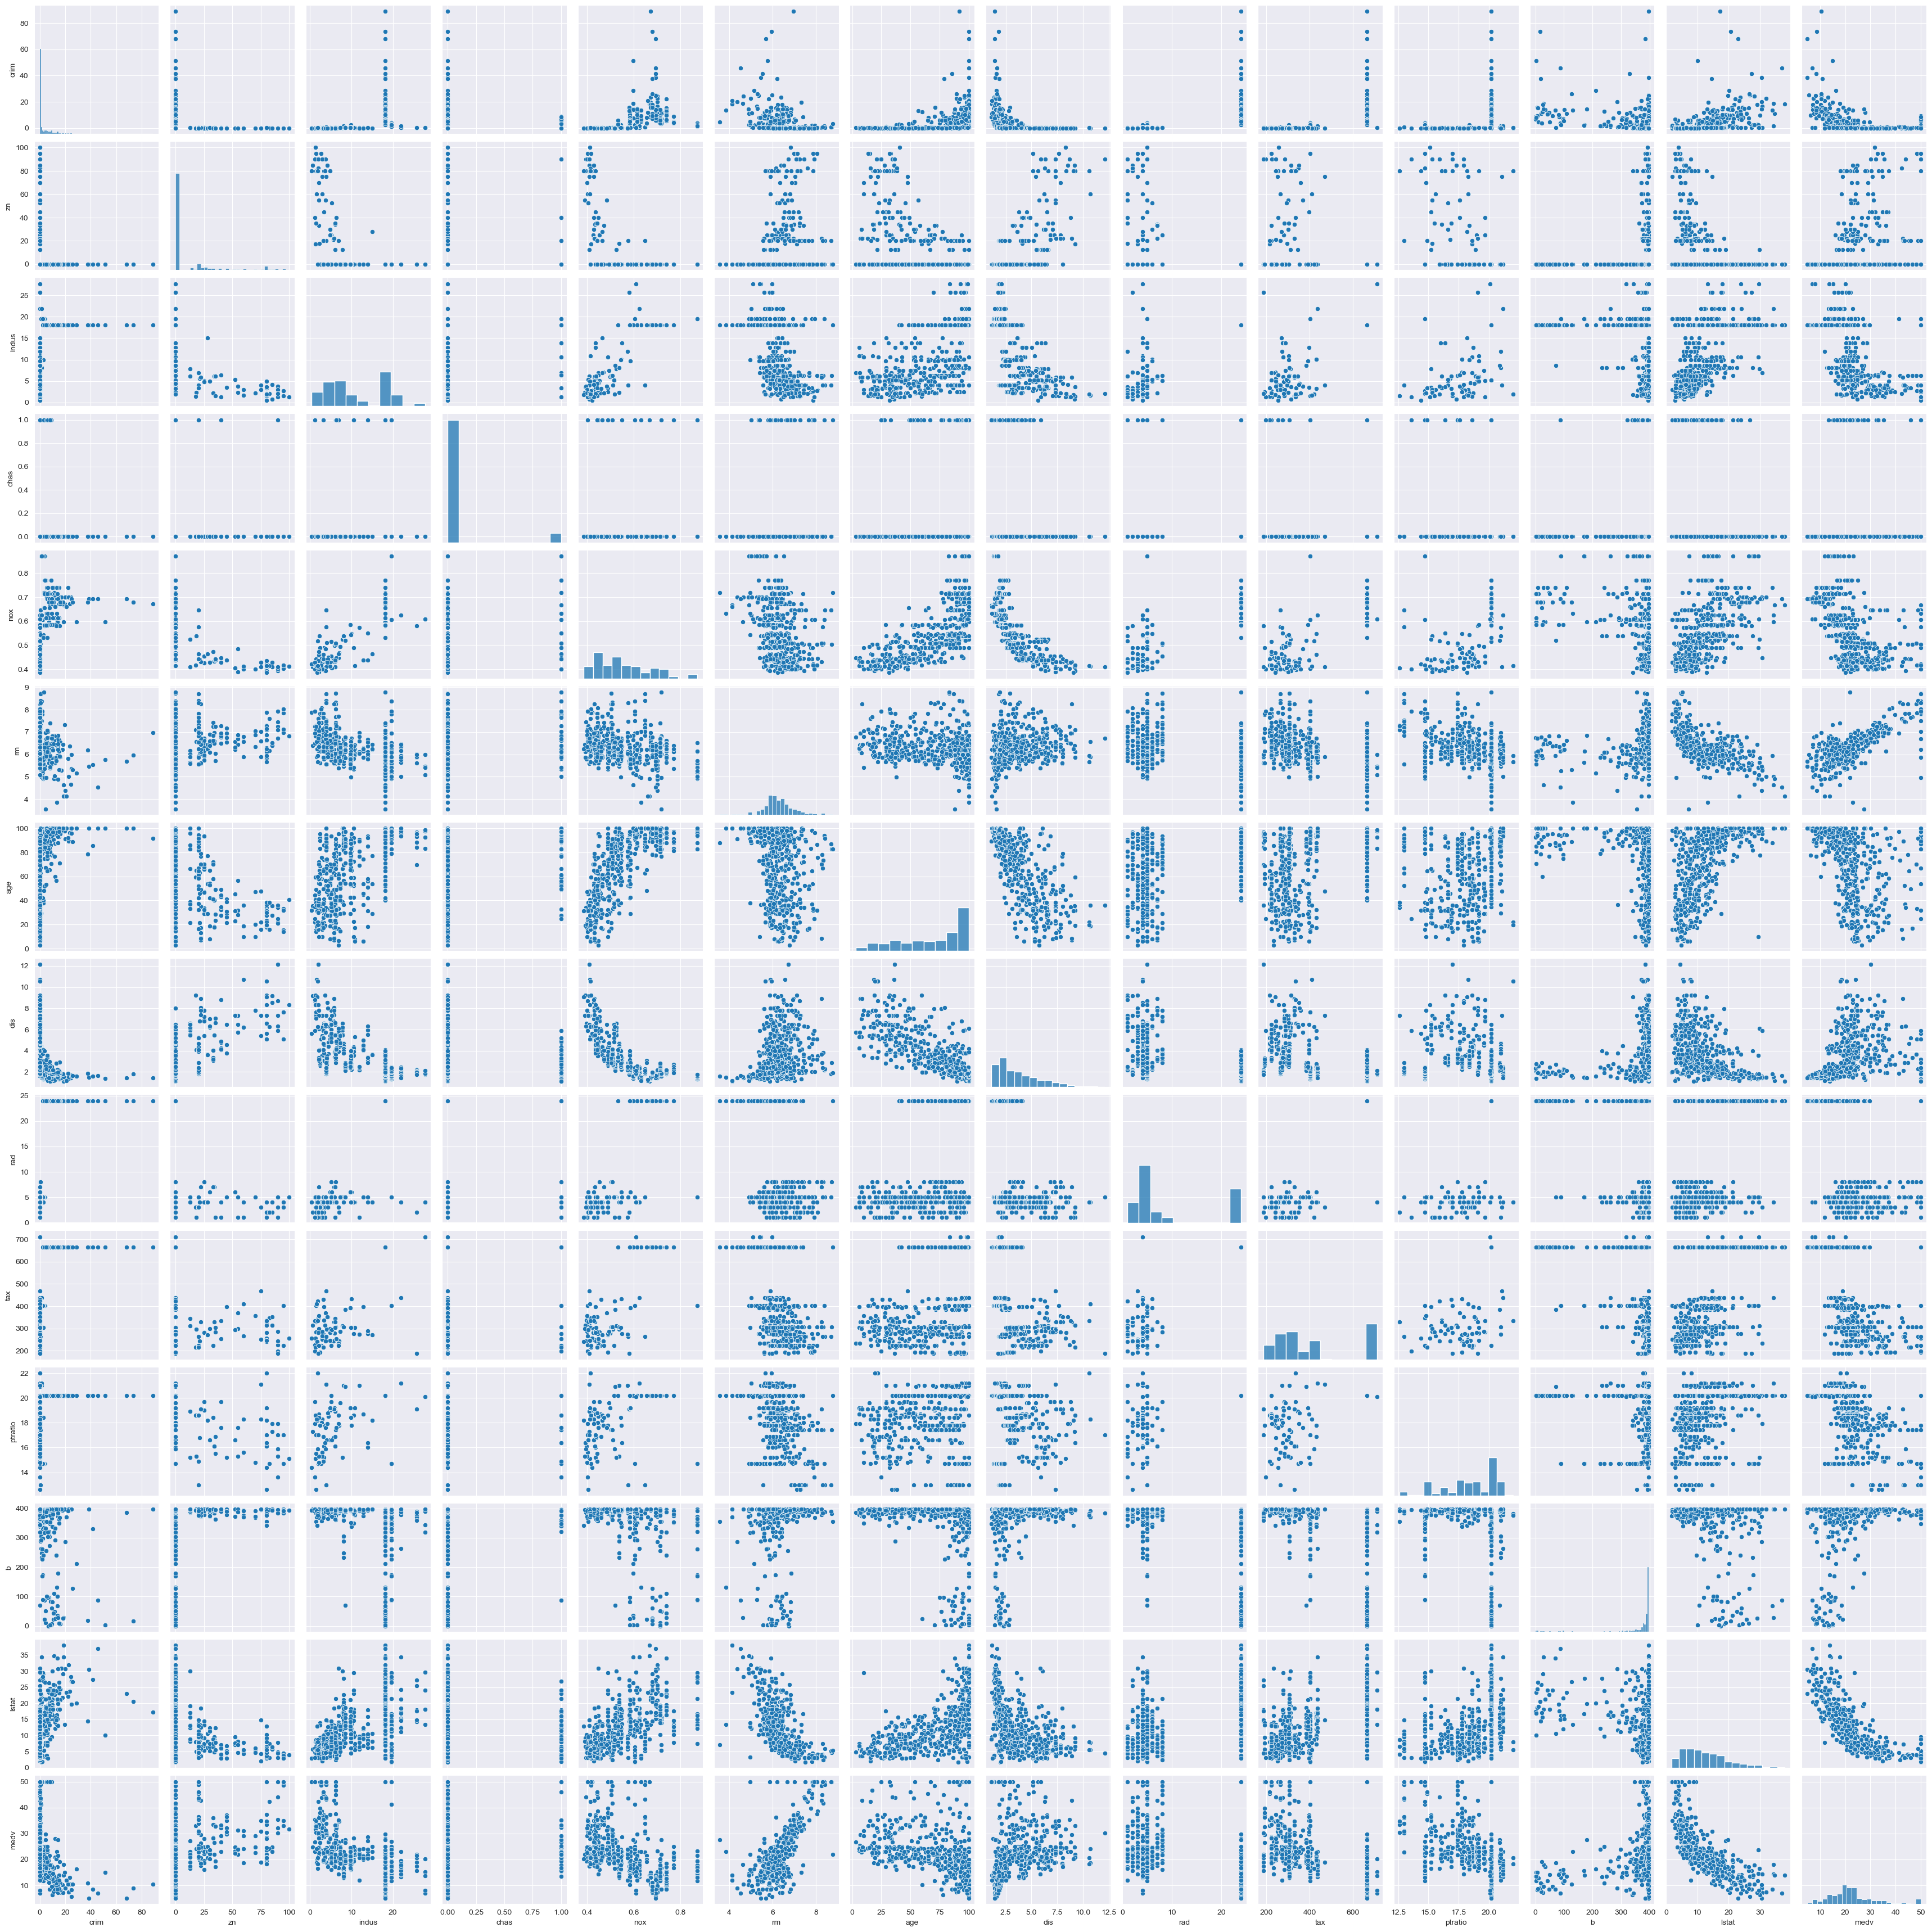

In [10]:
import seaborn as sns
sns.pairplot(boston)

Text(0, 0.5, 'Price in $1000s')

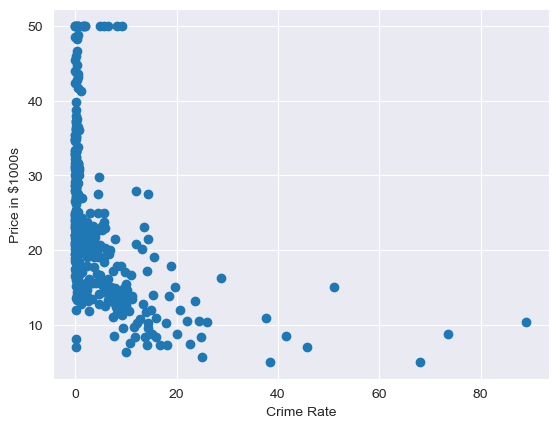

In [11]:
plt.scatter(boston['crim'],boston['medv'])
plt.xlabel('Crime Rate')
plt.ylabel('Price in $1000s')

Text(0, 0.5, 'Price in 1000$')

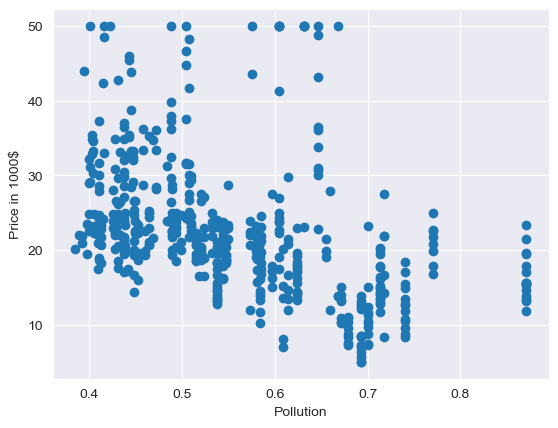

In [12]:
plt.scatter(boston['nox'],boston['medv'])
plt.xlabel('Pollution')
plt.ylabel('Price in 1000$')

Text(0, 0.5, 'Price in $1000s')

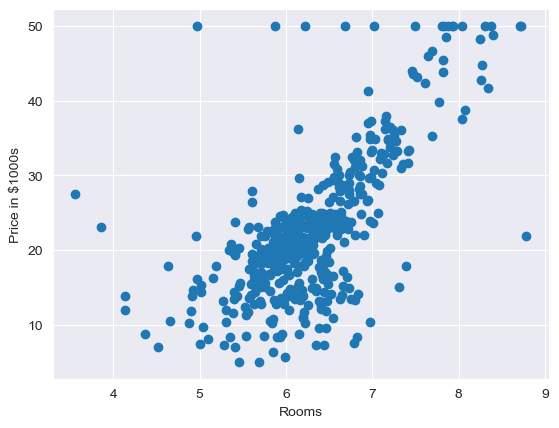

In [13]:
plt.scatter(boston['rm'],boston['medv'])
plt.xlabel('Rooms')
plt.ylabel('Price in $1000s')

Text(0, 0.5, 'Price in $1000s')

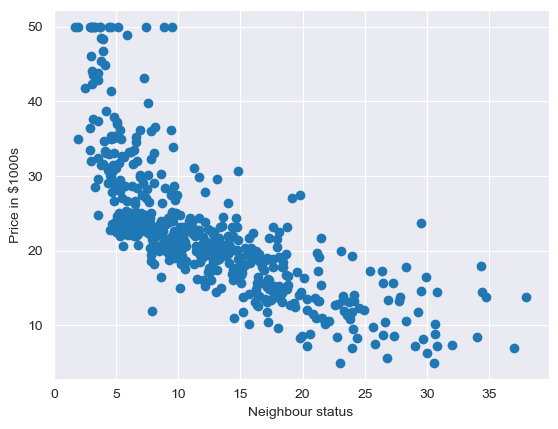

In [14]:
plt.scatter(boston['lstat'],boston['medv'])
plt.xlabel('Neighbour status')
plt.ylabel('Price in $1000s')

Text(0, 0.5, 'Price in $1000s')

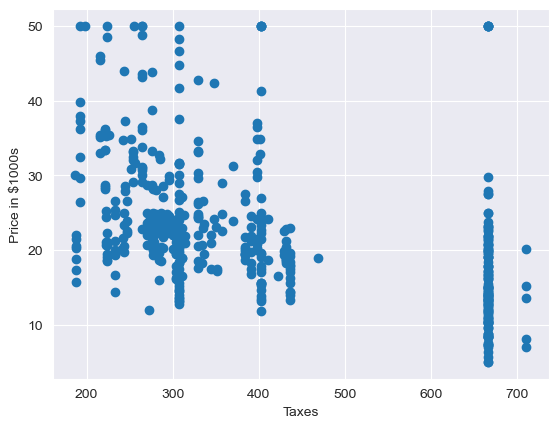

In [15]:
plt.scatter(boston['tax'],boston['medv'])
plt.xlabel('Taxes')
plt.ylabel('Price in $1000s')

<Axes: xlabel='rm', ylabel='medv'>

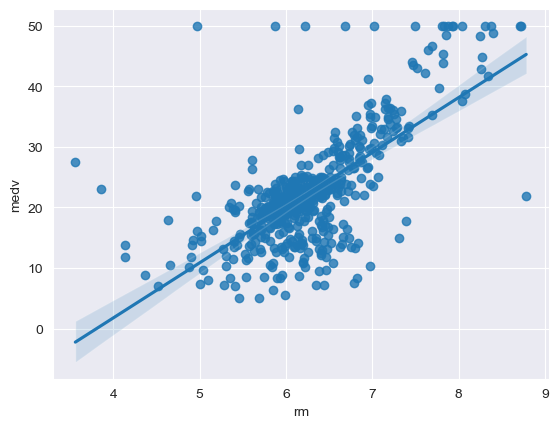

In [16]:
sns.regplot(x='rm',y='medv',data=boston)

<Axes: xlabel='lstat', ylabel='medv'>

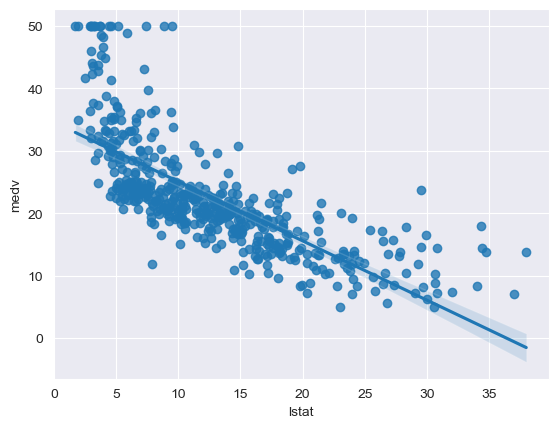

In [17]:
sns.regplot(x='lstat',y='medv',data=boston)

<Axes: xlabel='ptratio', ylabel='medv'>

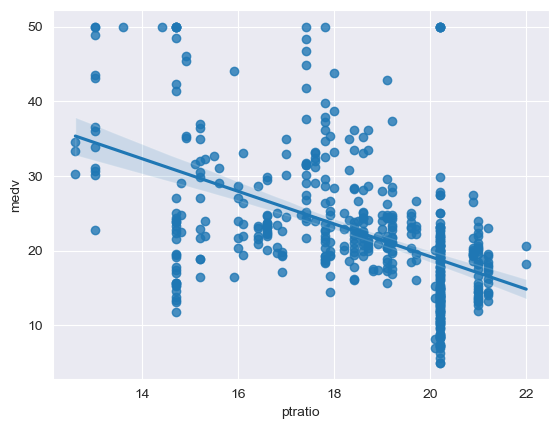

In [18]:
sns.regplot(x='ptratio',y='medv',data=boston)

Splitting features

In [19]:
X = boston.iloc[:,:-1]
Y = boston.iloc[:,-1]

Train Test split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
391,5.29305,0.0,18.10,0,0.700,6.051,82.5,2.1678,24,666,20.2,378.38,18.76
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02
327,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79
337,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00
275,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50
440,22.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11


In [22]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33
76,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398,18.7,373.66,11.97
380,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
444,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58


Stndarize the dataset

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#X_train
#X_test

Training the model

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [26]:
print(lr.coef_)
print(lr.intercept_)

[-0.77069915  1.03071461  0.27913167  0.56447864 -1.68029622  2.82276603
  0.27220188 -2.88770879  2.54815414 -2.03833449 -1.89508943  1.13266888
 -4.2357555 ]
22.90349999999999


In [27]:
# parameter model trained
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [28]:
pred = lr.predict(X_test)

In [29]:
pred

array([10.18296392, 22.90028638, 15.7250715 , 32.8687425 , 23.06305477,
       11.7105764 , 12.82823273, 19.68402832, 21.37844603, 11.6664091 ,
       18.68922207, 30.07985757, -1.00929105, 25.84534881,  2.71769491,
        8.42105272, 24.20065448, 18.58158855, 25.35750486, -6.4156406 ,
       13.40087749, 19.1553702 , 26.97331835, 19.7365225 , 22.34723932,
       16.49474319, 28.88299512, 25.84032247, 18.44473853, 21.44179917,
       20.47924119, 30.65762986, 18.03142754, 31.7042724 , 31.32197253,
       22.39925592,  7.89877816, 23.82379177,  8.79518229, 24.80967266,
       13.11828624, 36.50280369, 14.21716209, 30.64314489, 13.08150701,
       28.62892717, 30.41900005, 20.22002346, 18.50467142, 13.74969166,
       24.00007979, 33.05373811, 16.31792202, 11.83136693, 34.38516527,
       33.21409913, 17.58969598, 18.73951491, 15.77944095, 27.36843691,
       20.56962491, 41.00811461, 20.7069354 ,  7.90355031, 26.05404575,
       28.09290827, 11.99510305,  7.63645472, 27.23768211, 16.49

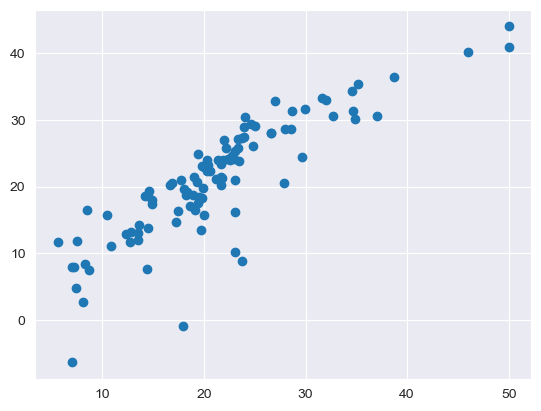

In [30]:
plt.scatter(Y_test,pred)

In [31]:
error = Y_test - pred
error

367    12.917036
76     -2.900286
380    -5.325071
160    -5.868743
108    -3.263055
         ...    
89     -2.564455
78      0.052172
444    -0.249278
16      2.096403
254    -2.071633
Name: medv, Length: 101, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_6560\2786896468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='medv', ylabel='Density'>

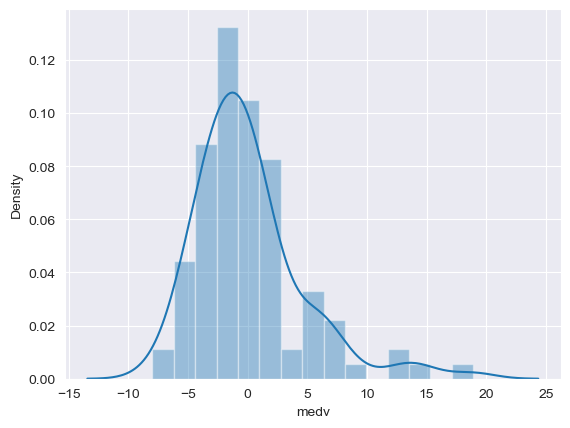

In [32]:
sns.distplot(error)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test,pred))
print(mean_squared_error(Y_test,pred))

3.2428569148107047
20.687720473048522


In [34]:
# Accuracy score
from sklearn.metrics import r2_score
r2_score(Y_test,pred)

0.7200277678580311

Adding new data

In [35]:
custom_input = pd.DataFrame(
    {
        'crim':[0.00632],
        'zn':[18.0],
        'indus':[2.31],
        'chas':[0],
        'nox':[0.538],
        'rm':[6.34],
        'age':[15.6],
        'dis':[4.678],
        'rad':[2.09],
        'tax':[296.0],
        'ptratio':[15.3],
        'b':[396.9],
        'lstat':[4.98]
    }
)
sc.transform(custom_input)
prediction = lr.predict(sc.transform(custom_input))
print(prediction)

[28.52017688]


Pickling the file

In [36]:
import pickle
filename = 'boston_lr_model'
pickle.dump(lr,open(filename,'wb'))

In [37]:
pickled_model = pickle.load(open(filename,'rb'))
pickled_model.predict(sc.transform(custom_input))

array([28.52017688])